In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import csv

In [2]:
def get_translation_table(filename):
    file_path = "Data_Translation_Tables\{}.csv" 
    with open(file_path.format(filename), "r") as inp:
        reader = csv.reader(inp)
        dict_csv = {rows[0]:rows[1] for rows in reader}
    return dict_csv

In [3]:
def correlation_matrix(df: pd.DataFrame):
    """
    A function to calculate and plot
    correlation matrix of a DataFrame.
    """
    # Create the matrix
    matrix = df.corr()
    
    # Create cmap
    cmap = sns.diverging_palette(250, 15, s=75, l=40,
                             n=9, center="light", as_cmap=True)
    # Create a mask
    mask = np.triu(np.ones_like(matrix, dtype=bool))
    
    # Make figsize bigger
    fig, ax = plt.subplots(figsize=(16,12))
    
    # Plot the matrix
    _ = sns.heatmap(matrix, mask=mask, center=0, annot=True,
             fmt='.2f', square=True, cmap=cmap, ax=ax)
    saveable = _.get_figure()
#     saveable.savefig("Dataset_Coorelation_Matrix.jpg")

In [4]:
data_raw = pd.read_csv("Crimes_2021_Dataset.csv")
data_raw.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,12259646,JE101358,1/1/2021 0:00,087XX S COTTAGE GROVE AVE,810,THEFT,OVER $500,RESIDENCE,False,False,...,8.0,44,6,1183088.0,1847314.0,2021,1/16/2021 15:49,41.736227,-87.604811,"(41.73622739, -87.604810841)"
1,12259424,JE100501,1/1/2021 0:00,062XX S MICHIGAN AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,20.0,40,14,1178263.0,1863570.0,2021,1/16/2021 15:49,41.780946,-87.621995,"(41.780946398, -87.621995369)"
2,12259264,JE100537,1/1/2021 0:00,062XX S COTTAGE GROVE AVE,420,BATTERY,AGGRAVATED - KNIFE / CUTTING INSTRUMENT,APARTMENT,False,False,...,20.0,42,04B,1182638.0,1863733.0,2021,1/16/2021 15:49,41.781293,-87.605951,"(41.781293251, -87.60595085)"
3,12258861,JE100369,1/1/2021 0:00,016XX N CICERO AVE,051A,ASSAULT,AGGRAVATED - HANDGUN,ALLEY,False,False,...,37.0,25,04A,1144145.0,1910673.0,2021,1/16/2021 15:49,41.910910,-87.745899,"(41.910909931, -87.745898897)"
4,12259020,JE100698,1/1/2021 0:00,075XX S JEFFERY BLVD,141B,WEAPONS VIOLATION,UNLAWFUL USE - OTHER FIREARM,STREET,False,False,...,8.0,43,15,1190847.0,1855361.0,2021,1/16/2021 15:49,41.758125,-87.576126,"(41.758125331, -87.576125553)"


In [5]:
#Shows the information regarding the original dataset and it's types
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172061 entries, 0 to 172060
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    172061 non-null  int64  
 1   Case Number           172061 non-null  object 
 2   Date                  172061 non-null  object 
 3   Block                 172061 non-null  object 
 4   IUCR                  172061 non-null  object 
 5   Primary Type          172061 non-null  object 
 6   Description           172061 non-null  object 
 7   Location Description  171478 non-null  object 
 8   Arrest                172061 non-null  bool   
 9   Domestic              172061 non-null  bool   
 10  Beat                  172061 non-null  int64  
 11  District              172061 non-null  int64  
 12  Ward                  172051 non-null  float64
 13  Community Area        172061 non-null  int64  
 14  FBI Code              172061 non-null  object 
 15  

In [6]:
#Drop the following arbitrary columns:
# "ID","Case Number","Updated On", "Year", "Location"
data = pd.read_csv("Crimes_2021_Dataset.csv")
data = data.drop(['ID','Case Number','Updated On', 'Location', 'Year', 'Block'], axis = 1)
# data.head()

In [7]:
# Convert the following bool types to integer values 1/True, 0/False:
# "Arrest", "Domestic"
boolean_dict = {True : 1, False : 0}
data['Arrest'] = data_raw['Arrest'].map(boolean_dict)
data['Domestic'] = data_raw['Domestic'].map(boolean_dict)


In [8]:
# Convert the following columns using the translation tables:
# "IUCR", "Primary Type", "Location Description", "Description", "FBI Code"
primary_type_dict = get_translation_table("Primary_Type_Translation_Table")
location_description_dict = get_translation_table("Location_Description_Translation_Table")
iucr_dict = get_translation_table("IUCR_Translation_Table")
fbi_code_dict = get_translation_table("FBI_Code_Translation_Table")
description_dict = get_translation_table("Description_Translation_Table")

data['Primary Type'] = data_raw['Primary Type'].map(primary_type_dict).fillna("0").astype(np.int64)
data['Location Description'] = data_raw['Location Description'].map(location_description_dict).fillna("0").astype(np.int64)
data['IUCR'] = data_raw['IUCR'].map(iucr_dict).fillna("0").astype(np.int64)
data['FBI Code'] = data_raw['FBI Code'].map(fbi_code_dict).fillna("0").astype(np.int64)
data['Description'] = data_raw['Description'].map(description_dict).fillna("0").astype(np.int64)

data.tail()

,Date,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Latitude,Longitude
172056,11/3/2021 23:34,280,30,182,103,0,0,123,1,4.0,32,24,1177389.0,1897003.0,41.872709,-87.624188
172057,11/3/2021 23:48,62,31,256,112,0,0,1122,11,28.0,26,12,1149894.0,1899717.0,41.880736,-87.725064
172058,11/3/2021 23:50,229,3,100,99,0,1,524,5,34.0,53,6,1171393.0,1828317.0,41.684360,-87.648211
172059,11/3/2021 23:50,24,9,87,89,0,0,1134,11,24.0,27,8,NaN,NaN,NaN,NaN
172060,11/3/2021 23:57,46,6,251,112,0,0,215,2,3.0,38,11,1177475.0,1874979.0,41.812272,-87.624539


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172061 entries, 0 to 172060
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  172061 non-null  object 
 1   IUCR                  172061 non-null  int64  
 2   Primary Type          172061 non-null  int64  
 3   Description           172061 non-null  int64  
 4   Location Description  172061 non-null  int64  
 5   Arrest                172061 non-null  int64  
 6   Domestic              172061 non-null  int64  
 7   Beat                  172061 non-null  int64  
 8   District              172061 non-null  int64  
 9   Ward                  172051 non-null  float64
 10  Community Area        172061 non-null  int64  
 11  FBI Code              172061 non-null  int64  
 12  X Coordinate          170784 non-null  float64
 13  Y Coordinate          170784 non-null  float64
 14  Latitude              170784 non-null  float64
 15  

In [10]:
# Convert date to readable format using the following format:
# '%m/%d/%Y %H:%M'
# Then, seperate Date into individual day, month, week, hour, minute, and dayofweek columns for analysis
data['Date'] = pd.to_datetime(data_raw['Date'],
                             format = '%m/%d/%Y %H:%M',
                             errors = 'coerce')
data['Date_day'] = data['Date'].dt.day
data['Date_month'] = data['Date'].dt.month
data['Date_week'] = data['Date'].dt.week
data['Date_hour'] = data['Date'].dt.hour
data['Date_minute'] = data['Date'].dt.minute
data['Date_dayofweek'] = data['Date'].dt.dayofweek
data.tail()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172061 entries, 0 to 172060
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  172061 non-null  datetime64[ns]
 1   IUCR                  172061 non-null  int64         
 2   Primary Type          172061 non-null  int64         
 3   Description           172061 non-null  int64         
 4   Location Description  172061 non-null  int64         
 5   Arrest                172061 non-null  int64         
 6   Domestic              172061 non-null  int64         
 7   Beat                  172061 non-null  int64         
 8   District              172061 non-null  int64         
 9   Ward                  172051 non-null  float64       
 10  Community Area        172061 non-null  int64         
 11  FBI Code              172061 non-null  int64         
 12  X Coordinate          170784 non-null  float64       
 13 

<ipython-input-10-b1235c04c44e>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Date_week'] = data['Date'].dt.week


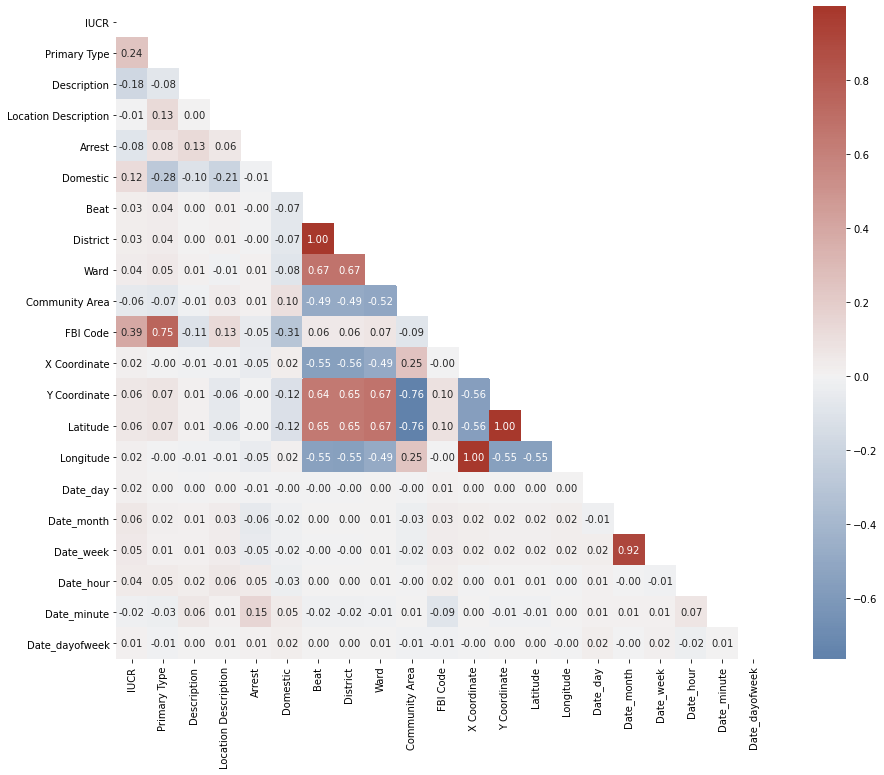

In [11]:
# Sample testing for pairplots and pairwise coorelation matrices
correlation_matrix(data)

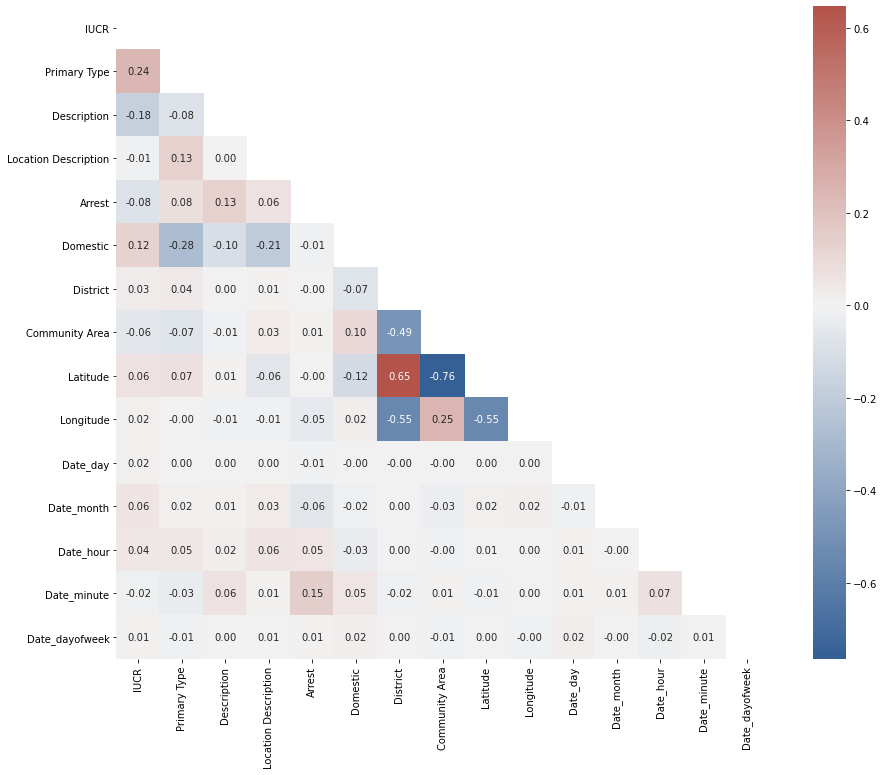

In [12]:
data_s = data.drop(['Ward','FBI Code','X Coordinate', 'Y Coordinate', 'Date_week', 'Beat'], axis = 1)
correlation_matrix(data_s)